In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [50]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources\hawaii.sqlite")

In [52]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [53]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [54]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [55]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1540fd6e588>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [57]:
recent_date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date = str(recent_date_query)
recent_date

"('2017-08-23',)"

In [58]:
previous_year_date = datetime.strptime(recent_date[2:-3], '%Y-%m-%d') - dt.timedelta(days=365)
print(previous_year_date.date())

2016-08-23


In [59]:
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= previous_year_date.date()).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [60]:
prcp_data = pd.DataFrame(results, columns=['Date','Precipitation'])
prcp_data.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_data_df = prcp_data.sort_index(axis=0)
prcp_data_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [61]:
# Define xticks for the graph
x_axis = np.arange(len(prcp_data_df.index.values))
tick_locations = [value for value in x_axis]
x_ticks = tick_locations[::250]
x_ticks

[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]

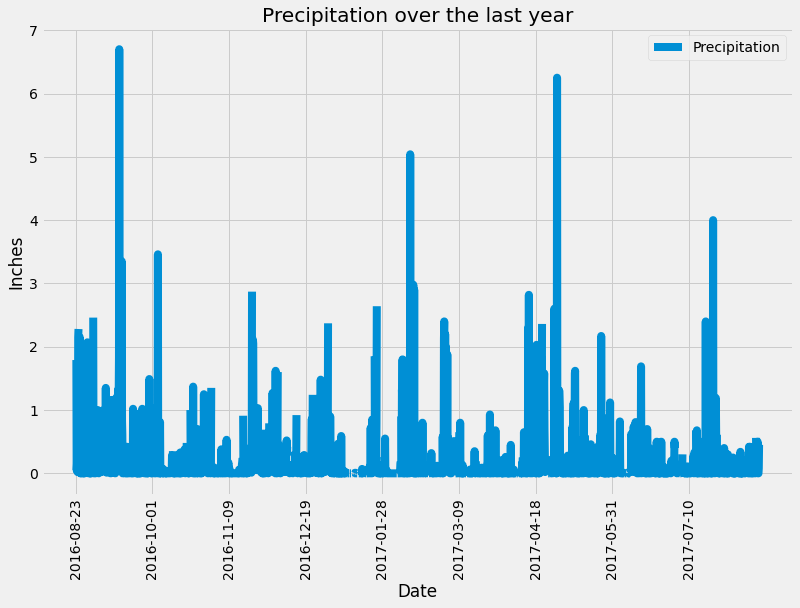

In [62]:
prcp_data_df.plot(title="Precipitation over the last year", figsize=(12,8), rot=90, grid=True, xticks=x_ticks, linewidth=8)
plt.ylabel('Inches')
plt.savefig("Images/prcp.png")
plt.show()

In [63]:
prcp_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [64]:
prcp_data1 = prcp_data_df.groupby('Date')
prcp_data1["Precipitation"].describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2016-08-23,6.0,0.451667,0.706468,0.00,0.0275,0.100,0.5625,1.79
2016-08-24,6.0,1.555000,0.840541,0.08,1.2775,1.800,2.1500,2.28
2016-08-25,7.0,0.077143,0.071813,0.00,0.0300,0.080,0.0950,0.21
2016-08-26,6.0,0.016667,0.016330,0.00,0.0025,0.015,0.0275,0.04
2016-08-27,5.0,0.064000,0.081731,0.00,0.0000,0.020,0.1200,0.18
...,...,...,...,...,...,...,...,...
2017-08-19,3.0,0.030000,0.051962,0.00,0.0000,0.000,0.0450,0.09
2017-08-20,2.0,0.005000,0.007071,0.00,0.0025,0.005,0.0075,0.01
2017-08-21,3.0,0.193333,0.317700,0.00,0.0100,0.020,0.2900,0.56


# Exploratory Station Analysis

In [65]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x154117d75f8>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [66]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).\
    group_by(Measurement.station).count()
station_count

9

In [68]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
             
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations[0][0]
highest_observations = active_stations[0][1]
active_station_names = session.query(Station.name).\
    filter(Station.station == most_active_station_id).all()

active_station_name = active_station_names[0][0]
active_station_name

'WAIHEE 837.5, HI US'

In [72]:
print(f"The most active station is {active_station_name} with station ID {most_active_station_id} and {highest_observations} observations")

The most active station is WAIHEE 837.5, HI US with station ID USC00519281 and 2772 observations


In [73]:
temperatures = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()
temperatures

print(f"Highest Temperature recorded at Station {active_station_name} is {round(temperatures[0][0],2)} F")
print(f"Lowest Temperature recorded at Station {active_station_name} is {round(temperatures[0][1],2)} F")
print(f"Average Temperature recorded at Station {active_station_name} is {round(temperatures[0][2],2)} F")

Highest Temperature recorded at Station WAIHEE 837.5, HI US is 85.0 F
Lowest Temperature recorded at Station WAIHEE 837.5, HI US is 54.0 F
Average Temperature recorded at Station WAIHEE 837.5, HI US is 71.66 F


In [76]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= previous_year_date, Measurement.station == most_active_station_id).all()
temperature_data

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

In [75]:
temp_df = pd.DataFrame(temperature_data, columns=['tobs'])
temp_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


In [77]:
temp_df = pd.DataFrame(temperature_data, columns=['tobs'])
temp_df


,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


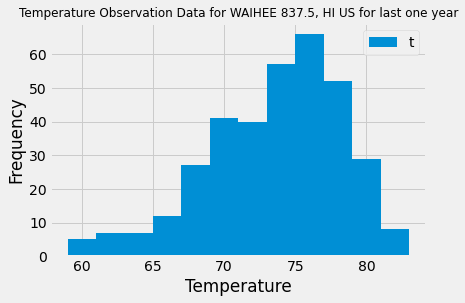

In [78]:
plt.hist(temp_df["tobs"], bins = 12)
plt.legend("tobs")
plt.title(f"Temperature Observation Data for {active_station_name} for last one year", fontsize=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("Images/tobs.png")
plt.show()

In [79]:
first_date_query = session.query(Measurement.date).order_by(Measurement.date).first()
first_date = str(first_date_query)
first_date[2:-3]

'2010-01-01'

# Close session

In [80]:
# Close Session
session.close()